In [15]:
import numpy as np
import pandas as pd
from liwc import Liwc
from matplotlib import pyplot as plt
import seaborn as sns
import json
from tqdm import tqdm
import scipy
import glob
import re
import yaml
import warnings
import nltk
warnings.filterwarnings("ignore")
tqdm.pandas()

import scipy.stats as stats

filepaths = yaml.safe_load(open("../../../config/filepaths.yaml"))

import sys
sys.path.append(filepaths['utils'])
from data import *
from liwc_utils import *
from analisys import *

In [16]:
plt.rcParams['axes.labelsize']  = 14 # fontes no tamanho usado no template
plt.rcParams['axes.titlesize']  = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.family'] = 'serif'
# plt.rcParams['text.usetex'] = True
plt.rcParams['lines.linewidth'] = 1.5

plt.style.use('tableau-colorblind10') # use um estilo colorblind!
plt.ion()

---

In [17]:
DATASET = 'coraal-buckeye' # 'coraal-buckeye' | 'twitter' | 'youtube' | 'interview'

data = load_dataset(DATASET)
data.head(1)

,text,perspective_score,flair_score,textblob_score,vader_score,detoxify_original_score,detoxify_unbiased_score,detoxify_multilingual_score,has_swearing,file,group
0,"text, mmhm, yes, um, ivory city northeast ivor...",0.046122,0.789697,0.375,0.0,0.000628,0.000439,0.000305,False,DCB_se1_ag4_f_01_1.txt,Black Woman


In [18]:
df = data.copy()
df['text'] = df['text'].apply(lambda x: re.sub("[^\w\d'\s]+",'',x))
df['len'] = df.text.str.split(' ').str.len()
df['words'] = df.text.str.split(' ')

---

In [19]:
def count_word(df,word,group): 
    return df[df.group.str.contains(group)].words.apply(lambda x: x.count(word)).sum()

def group_total_words(df,group):
    return df[df.group.str.contains(group)].len.sum()

def contain_word_idx(df,word):
    return df.words.apply(lambda x: word in x)

def calc_word_freq(df,word,group):    
    return count_word(df,word,group) / group_total_words(df,group)

In [20]:
def sequence_ocurences_in_list(sequence,list):
    """
    count the number of times a sequence appears in a list
    """
    i = 0
    count = 0
    while i < len(list):
        if list[i:i+len(sequence)] == sequence:
            count += 1
        i += 1
    return count

def count_sequence(df,sequence,group):
    return df[df.group.str.contains(group)].words.apply(lambda x: sequence_ocurences_in_list(sequence,x)).sum()

def contain_sequence_idx(df,sequence):
    return df.words.apply(lambda x: sequence_ocurences_in_list(sequence,x)) > 0

def calc_sequence_freq(df,sequence,group):    
    return count_sequence(df,sequence,group) / group_total_words(df,group)

def calc_freq(df,x,group):
    if isinstance(x,str):
        return calc_word_freq(df,x,group)
    elif isinstance(x,list):
        return calc_sequence_freq(df,x,group)
    else:
        raise ValueError('x must be a string or a list')

def contain_term_idx(df,term):
    if isinstance(term,str):
        return contain_word_idx(df,term)
    elif isinstance(term,list):
        return contain_sequence_idx(df,term)
    else:
        raise ValueError('term must be a string or a list')

---

# Individual word analysis

## Terms more used by black
Table 5: https://www.jstor.org/stable/pdf/455845.pdf

In [130]:
word = 'bad'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0003864554043789395 319 825451
0.000652575861943951 180 275830


In [131]:
word = 'bougie'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

9.691671583170896e-06 8 825451
0.0 0 275830


In [132]:
sequence = ['busting','out']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [134]:
word = 'freak'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

4.3612522124269034e-05 36 825451
3.625421455244172e-06 1 275830


In [135]:
word = 'fresh'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

4.3612522124269034e-05 36 825451
3.625421455244172e-06 1 275830


In [136]:
word = 'homie'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.211458947896362e-05 10 825451
0.0 0 275830


In [137]:
word = 'jones'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

2.422917895792724e-06 2 825451
0.0 0 275830


In [138]:
word = 'mondo'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [139]:
word = 'rednecks'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


## Terms in section 1.4.1 - (3) Terms for females

In [ ]:
word = 'bopper'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [ ]:
word = 'dime'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

3.634376843689086e-06 3 825451
1.0876264365732517e-05 3 275830


In [ ]:
word = 'honey'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

2.5440637905823603e-05 21 825451
1.812710727622086e-05 5 275830


In [140]:
sequence = ['hot','girl']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [141]:
word = 'ma'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

6.178440634271447e-05 51 825451
0.0 0 275830


In [ ]:
word = 'shorty'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

2.0594802114238155e-05 17 825451
0.0 0 275830


In [ ]:
word = 'wifey'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


## Terms in section 1.4.1 - (4) Terms for males

In [ ]:
word = 'balla'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [ ]:
word = 'cat'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

2.1806261062134517e-05 18 825451
2.1752528731465034e-05 6 275830


In [ ]:
word = 'cuz'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

2.0594802114238155e-05 17 825451
0.0 0 275830


In [ ]:
word = 'dawg'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [ ]:
word = 'dog'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.00010176255162329441 84 825451
9.426095783634848e-05 26 275830


In [ ]:
word = 'fool'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.3326048426859982e-05 11 825451
1.4501685820976689e-05 4 275830


In [ ]:
word = 'homes'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

5.5727111603232654e-05 46 825451
5.438132182866258e-05 15 275830


In [ ]:
word = 'kinfolk'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [ ]:
word = 'mark'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.5748966322652707e-05 13 825451
2.9003371641953377e-05 8 275830


In [ ]:
word = 'money'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.000632381570801901 522 825451
0.0008410977776166479 232 275830


In [ ]:
word = 'player'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

8.116774950905626e-05 67 825451
2.1752528731465034e-05 6 275830


In [ ]:
word = 'playa'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [ ]:
word = 'scrub'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [ ]:
word = 'slick'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.211458947896362e-05 10 825451
3.625421455244172e-06 1 275830


## Terms in section 1.4.1 - (8) Terms for money

In [142]:
word = 'benjis'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [143]:
word = 'benjamins'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [144]:
word = 'cabbage'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.211458947896362e-06 1 825451
0.0 0 275830


In [145]:
word = 'cheese'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

5.815002949902538e-05 48 825451
1.4501685820976689e-05 4 275830


In [146]:
word = 'cream'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

2.7863555801616327e-05 23 825451
3.625421455244172e-06 1 275830


In [147]:
word = 'duckets'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [148]:
word = 'franklins'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [149]:
word = 'paper'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

6.541878318640355e-05 54 825451
0.00018489649421745278 51 275830


In [150]:
word = 'scrilla'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


#### Brathwaite (1992) list

In [151]:
word = 'bucks'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

7.268753687378172e-06 6 825451
7.613385056012762e-05 21 275830


In [153]:
sequence = ['dead','presidents']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [152]:
word = 'dime'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

3.634376843689086e-06 3 825451
1.0876264365732517e-05 3 275830


In [154]:
word = 'paper'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

6.541878318640355e-05 54 825451
0.00018489649421745278 51 275830


In [155]:
sequence = ['cash','money']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

1.211458947896362e-06 1 825451
0.0 0 275830


In [156]:
word = 'dividends'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [157]:
word = 'dough'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.211458947896362e-06 1 825451
0.0 0 275830


In [12]:
# word = 'though'
# print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
# print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0007026461897798901 580 825451
0.0004060472029873473 112 275830


In [158]:
word = 'knot'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


## Terms for leaving (1)

In [159]:
word = 'bounce'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

2.5440637905823603e-05 21 825451
3.625421455244172e-06 1 275830


In [161]:
sequence = ['push','off']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [162]:
word = 'murk'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


##  Terms for expressing or showing envy (2)

In [163]:
sequence = ['playa','hatin']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [164]:
word = 'hatin'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [165]:
word = 'hating'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

4.845835791585448e-06 4 825451
0.0 0 275830


In [166]:
sequence = ['hatin','on']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [167]:
sequence = ['balla','blockin']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


##  Terms for communicating or connecting (3)

In [168]:
word = 'feel'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0012296308321148076 1015 825451
0.0007033317623173694 194 275830


In [169]:
sequence = ["we're",'here']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

7.268753687378172e-06 6 825451
0.0 0 275830


## Terms for making advances toward a member of the opposite sex (4)

In [170]:
sequence = ['push','up','on']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [171]:
sequence = ['get','wit']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [172]:
sequence = ['get','with']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

1.696042527054907e-05 14 825451
3.625421455244172e-06 1 275830


In [173]:
sequence = ['holler','at','that']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [174]:
word = 'sweatin'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [175]:
word = 'sweating'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

6.05729473948181e-06 5 825451
0.0 0 275830


## Terms for labeling that which is good, exciting, etc (5)

In [176]:
sequence = ['off','the','hook']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

3.634376843689086e-06 3 825451
3.625421455244172e-06 1 275830


In [177]:
sequence = ['off','the','chain']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

8.480212635274534e-06 7 825451
0.0 0 275830


In [178]:
word = 'krunk'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [179]:
word = 'banging'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.211458947896362e-05 10 825451
7.250842910488344e-06 2 275830


In [180]:
sequence = ['too','stupid']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


## Verbs from sction 3.2.3
https://aclanthology.org/P18-1131/

In [ ]:
word = 'wanna'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0014428476069445672 1191 825451
0.0007359605554145669 203 275830


In [ ]:
word = 'gotta'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0004942752507417158 408 825451
0.0001957727585831853 54 275830


In [ ]:
word = 'finna'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

3.634376843689086e-05 30 825451
0.0 0 275830


In [ ]:
word = 'bouta'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 825451
0.0 0 275830


In [ ]:
word = 'tryna'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.000224119905360827 185 825451
0.0 0 275830


In [ ]:
word = 'gonna'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0021224760767144264 1752 825451
0.0019214733712794112 530 275830


# All words analysis

In [45]:
terms = [
    # 'bad', 
    'bougie',
    ['busting','out'], 
    'freak', 
    'fresh', 
    'homie', 
    'jones', 
    'mondo',
    'rednecks',
    'bopper',
    'dime',

    'honey',
    ['hot','girl'],
    'ma',
    'shorty',
    'wifey',

    'balla',
    'cat',
    'cuz',
    'dawg',
    'dog',
    'fool',
    'homes',
    'kinfolk',
    'mark',
    'money',
    'player',
    'playa',
    'scrub',
    'slick',

    'benjis',
    'benjamins',
    'benjamin',
    'cabbage',
    'cheese',
    'cream',
    'duckets',
    'franklins',
    'franklin',
    'paper',
    'scrilla',

    'bucks',
    ['dead','presidents'],
    'dime',
    'paper',
    ['cash','money'],
    'dividends',
    'dough',
    'knot',
    'bounce',
    ['push','off'],
    'murk',

    ['playa','hatin'],
    'hatin',
    'hating',
    ['hatin','on'],
    ['balla','blockin'],

    'feel',
    ["we're",'here'],

    ['push','up','on'],
    ['get','wit'],
    ['get','with'],
    ['holler','at','that'],
    'sweatin',

    'sweating',
    ['off','the','hook'],
    ['off','the','chain'],
    'krunk',
    'banging',
    ['too','stupid'],

    'wanna',
    'gotta',
    'finna',
    'bouta',
    'tryna',
    'gonna',
]

In [46]:
len(terms)

75

In [42]:
black_freq = sum([calc_freq(df,x,'Black') for x in terms])
black_freq

0.0070070785546325585

In [43]:
white_freq = sum([calc_freq(df,x,'White') for x in terms])
white_freq

0.005206105209730631

In [44]:
black_freq/white_freq

1.3459348730670604

# Tocixity Analysis

In [38]:
idx = pd.Series()
for term in terms:
    if idx.empty:
        idx = contain_term_idx(df,term)
    else:
        idx = idx | contain_term_idx(df,term)

In [39]:
df_terms = pd.concat([
    df.loc[idx].copy().assign(black_term=True),
    df.loc[~idx].copy().assign(black_term=False)
])
print(idx.sum())
df_terms.head(1)


6073


,text,perspective_score,flair_score,textblob_score,vader_score,detoxify_original_score,detoxify_unbiased_score,detoxify_multilingual_score,has_swearing,file,group,len,words,black_term
53,our pictures were in the paper in um,0.039598,0.997028,0.375,0.0,0.000617,0.000422,0.00024,False,DCB_se1_ag4_f_01_1.txt,Black Woman,8,"[our, pictures, were, in, the, paper, in, um]",True


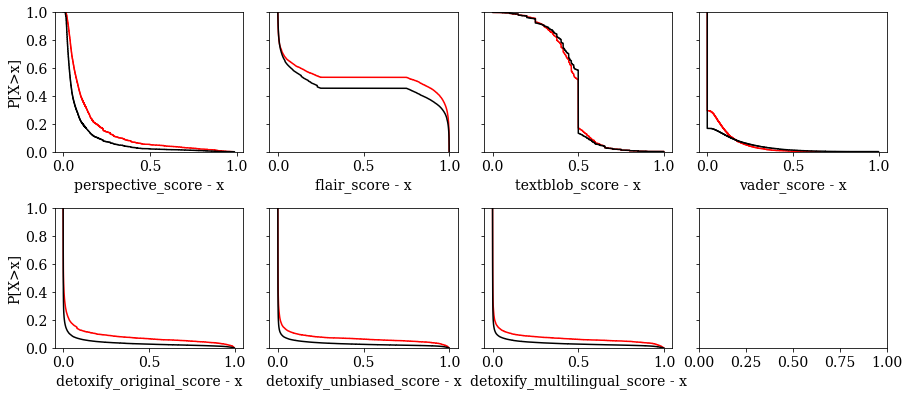

In [40]:
scores = [col for col in df_terms.columns if 'score' in col]

fig, axes = plt.subplots(2, 4, sharey=True, sharex=False, figsize=(12.8,5.6))
axes = axes.ravel()

for i,score in enumerate(scores):
    series_present = df_terms[df_terms.black_term][score]
    series_not_present = df_terms[ ~ df_terms.black_term][score]
    
    sns.ecdfplot(series_present, complementary=True, ax=axes[i], legend=False, color='red')
    g1 = sns.ecdfplot(series_not_present, complementary=True, ax=axes[i], legend=False, color='black')

    axes[i].set(ylabel='P[X>x]',xlabel='%s - x'%score)
fig.tight_layout()